# Popular Fandom Exploration

Using the data we scraped from the most popular fandoms on AO3, we will perform some data exploration and initial analysis in an attempt to see if there are any common trends between popular fandoms.

The popular fandoms we are looking at are within the following categories:
- Anime & Manga
- Books & Literature
- Cartoons, Comics, & Graphic Novels
- Celebrities & Real People
- Movies
- Music & Bands
- Other Media
- Theatre
- TV Shows
- Video Games
- Uncategorized Fandoms 
   - These fandoms were not large enough for us to effetively scrape them.

In [9]:
#import statements
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
#load in data
with open("../ao3bot/pop_fandoms_stats.json", "r") as f:
    temp_list = json.load(f)

Let's take a look at what the first set of data looks like:

In [3]:
temp_list[0]

{'fandom': '僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia',
 'total_works': 205105,
 'ratings': {'Teen And Up Audiences': '72662',
  'General Audiences': '46244',
  'Explicit': '36306',
  'Mature': '27347',
  'Not Rated': '22546'},
 'warnings': {'No Archive Warnings Apply': '100856',
  'Creator Chose Not To Use Archive Warnings': '73631',
  'Graphic Depictions Of Violence': '24980',
  'Major Character Death': '13621',
  'Underage': '8818',
  'Rape/Non-Con': '7502'},
 'categories': {'M/M': '110358',
  'F/M': '50314',
  'Gen': '40703',
  'Multi': '17178',
  'F/F': '14486',
  'Other': '9414'},
 'fandoms': {'僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia': '205105',
  'Naruto': '807',
  'Haikyuu!!': '582',
  'Harry Potter - J. K. Rowling': '454',
  'Shingeki no Kyojin | Attack on Titan': '381',
  'Original Work': '313',
  'Pocket Monsters | Pokemon - All Media Types': '295',
  'Katekyou Hitman Reborn!': '291',
  'One Piece': '277',
  'Marvel Cinematic Universe': '271'},
 '

We can see here that the first fandom we scraped was My Hero Academia or Boku no Hero Academia. We can also see what the general categories we have for analysis are, in particular we have:

| Tag | Description|
|:----|:-----------|
|total_works|This statistic is the total number of fics within the fandom. Note: some fics are only available when logged in, since we aren't our sampling is skewed.|
|ratings|Ratings consist of Teen and Up, General, Explicit, Mature, and Not Rated.|
|warnings|There are a few warnings that can be applied to fics, if the fics contain the mentioned material. There warnings are No Archive Warnings Apply, Creator Chose Not To Use Archive Warnings, Graphic Depictions Of Violence, Major Character Death, Underage, and Rape/Non-Con.|
|categories|Fics can fall within these categories that describe the relationships within the fic. There are M/M, F/M, F/F, Multi, Other, and Gen.|
|fandoms|This is a list of the most common fandoms within these fics, this is generally the main fandom and then fandoms that are popular within crossovers.|
|characters|This is a list of the most popular characters within the fic in the fandom.|
|relationships|This is a list of the most popular relationships within the fic in the fandom.|
|freeforms|These are tags that are author-written, so these are the most popular and common author-written tags.|

## Data Cleaning
There are a few things we need to do before we can start analyzing. One of those is clean the data.

To make it easier to analyze, I am going to put the data into a `pandas` dataframe.

In [4]:
df = pd.read_json('../ao3bot/pop_fandoms_stats.json')
df.head()

,fandom,total_works,ratings,warnings,categories,fandoms,characters,relationships,freeforms
0,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,205105,"{'Teen And Up Audiences': '72662', 'General Au...","{'No Archive Warnings Apply': '100856', 'Creat...","{'M/M': '110358', 'F/M': '50314', 'Gen': '4070...",{'僕のヒーローアカデミア | Boku no Hero Academia | My Her...,"{'Midoriya Izuku': '105193', 'Bakugou Katsuki'...","{'Bakugou Katsuki/Midoriya Izuku': '27917', 'B...","{'Fluff': '37356', 'Angst': '26229', 'Bakugou ..."
1,Haikyuu!!,125858,"{'General Audiences': '42277', 'Teen And Up Au...","{'No Archive Warnings Apply': '76013', 'Creato...","{'M/M': '100926', 'F/M': '14863', 'Gen': '1154...","{'Haikyuu!!': '125858', '僕のヒーローアカデミア | Boku no...","{'Hinata Shouyou': '34110', 'Oikawa Tooru': '3...","{'Iwaizumi Hajime/Oikawa Tooru': '17267', 'Hin...","{'Fluff': '34155', 'Angst': '16018', 'Establis..."
2,Naruto,81515,"{'Teen And Up Audiences': '26331', 'General Au...","{'No Archive Warnings Apply': '41377', 'Creato...","{'M/M': '38025', 'F/M': '27278', 'Gen': '17835...","{'Naruto': '80881', 'Boruto: Naruto Next Gener...","{'Uzumaki Naruto': '30469', 'Hatake Kakashi': ...","{'Uchiha Sasuke/Uzumaki Naruto': '10264', 'Hat...","{'Fluff': '8646', 'Alternate Universe - Canon ..."
3,Shingeki no Kyojin | Attack on Titan,63380,"{'Teen And Up Audiences': '18055', 'Explicit':...",{'Creator Chose Not To Use Archive Warnings': ...,"{'M/M': '37177', 'F/M': '19415', 'F/F': '6910'...",{'Shingeki no Kyojin | Attack on Titan': '6319...,"{'Levi Ackerman': '35915', 'Eren Yeager': '335...","{'Levi Ackerman/Eren Yeager': '15780', 'Levi A...",{'Alternate Universe - Modern Setting': '11022...
4,Miraculous Ladybug,48526,"{'General Audiences': '21597', 'Teen And Up Au...","{'No Archive Warnings Apply': '30296', 'Creato...","{'F/M': '33408', 'Gen': '8446', 'F/F': '4124',...","{'Miraculous Ladybug': '48526', 'Batman - All ...","{'Marinette Dupain-Cheng | Ladybug': '40087', ...",{'Adrien Agreste | Chat Noir/Marinette Dupain-...,"{'Fluff': '10478', 'Identity Reveal': '6393', ..."


In [5]:
df["warnings"][0]['No Archive Warnings Apply']

'100856'

## Data Exploration

Now lets take a closer look at the data that we have.

### Fandom Comparisons

We scraped the `All Fandoms` page on AO3 so the data that we have reflects the most popular fandoms within each of the categories. Let take a look and see the distribution between fandoms in general and then look at each of the fandoms in comparison to their categories.

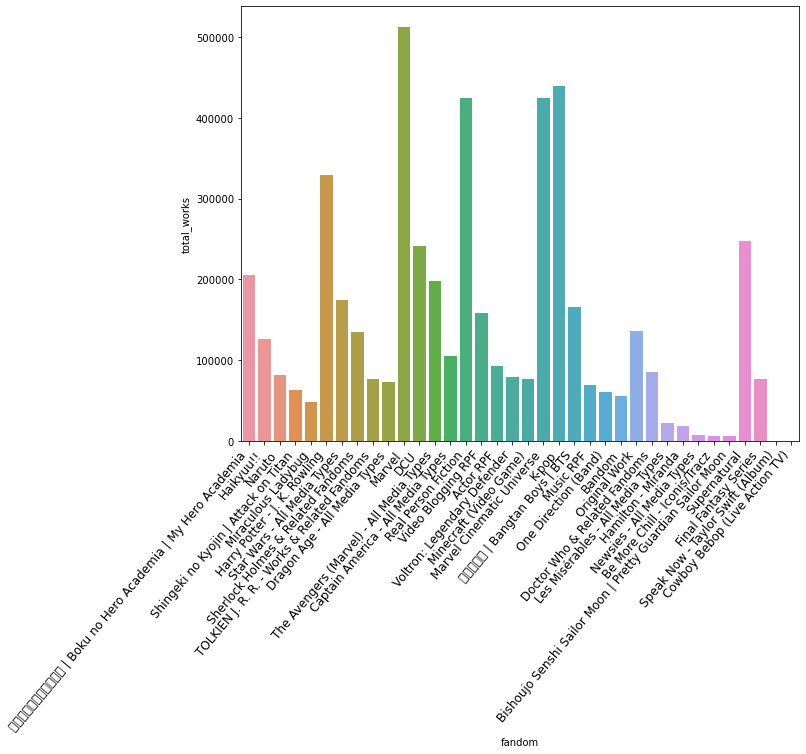

In [10]:
#define data
fandoms = df["fandom"]
total_works = df["total_works"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:35]

plt.figure(figsize=(10,8))

ax = sns.barplot(x="fandom", y="total_works", data=df)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### Ratings
Now let's look at the distribution of ratings between fandoms. First we need to get the rating data into a form we can use.

In [7]:
temp_ratings = df["ratings"].tolist()
for i in range(len(temp_ratings)):
    temp_ratings[i]["Fandom"] = fandoms[i]
ratings = pd.DataFrame(temp_ratings, columns = ["Fandom", "Teen And Up Audiences", "General Audiences", "Explicit", "Mature", "Not Rated"])
ratings.rename(columns = {"Teen And Up Audiences":'Teen', "General Audiences": 'General', "Not Rated": 'NotRated'}, inplace = True)
ratings['Teen'] = pd.to_numeric(ratings['Teen'])
ratings['General'] = pd.to_numeric(ratings['General'])
ratings['Explicit'] = pd.to_numeric(ratings['Explicit'])
ratings['Mature'] = pd.to_numeric(ratings['Mature'])
ratings['NotRated'] = pd.to_numeric(ratings['NotRated'])

#Normalize data
#standardized_dataset = (dataset - mean(dataset)) / standard_deviation(dataset))
ratings_nums = ratings[["Teen", "General", "Explicit", "Mature", "NotRated"]]
ratings[["Teen", "General", "Explicit", "Mature", "NotRated"]] = (ratings_nums-ratings_nums.min())/(ratings_nums.max()-ratings_nums.min())
ratings.head()

,Fandom,Teen,General,Explicit,Mature,NotRated
0,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,0.444119,0.313212,0.438597,0.355953,0.373275
1,Haikyuu!!,0.255344,0.286343,0.199183,0.175437,0.190146
2,Naruto,0.160934,0.135829,0.163181,0.186541,0.113585
3,Shingeki no Kyojin | Attack on Titan,0.110350,0.084705,0.162613,0.160860,0.108322
4,Miraculous Ladybug,0.112306,0.146274,0.021807,0.030457,0.062831


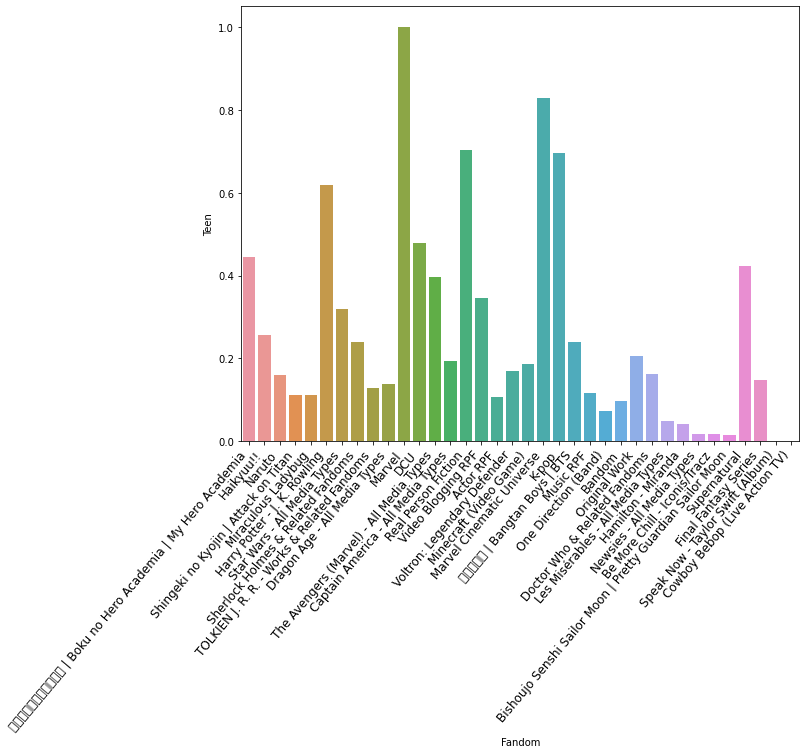

In [11]:
#create bar chart for Teen
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="Teen", data=ratings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

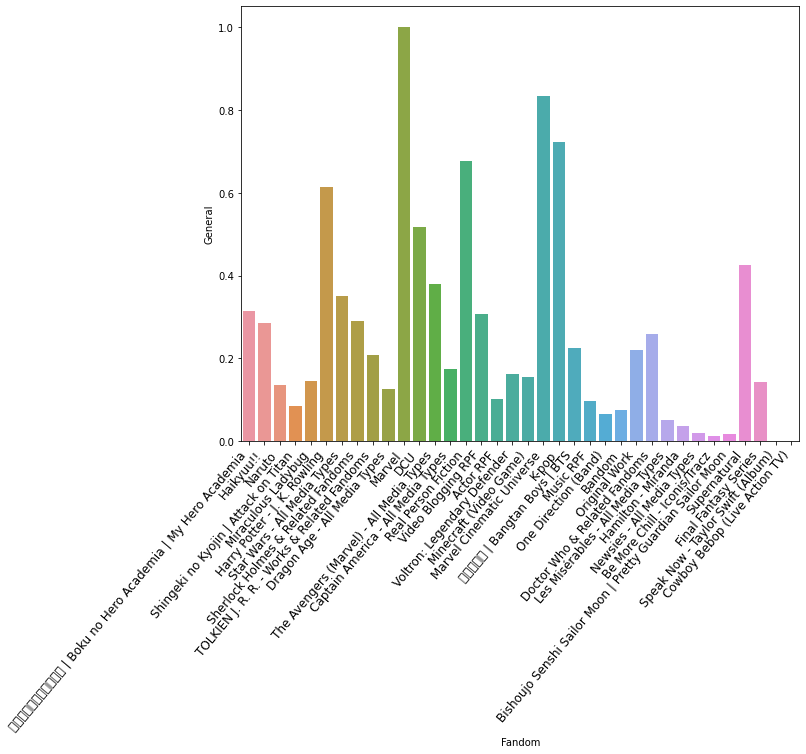

In [12]:
#create bar chart for General
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="General", data=ratings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

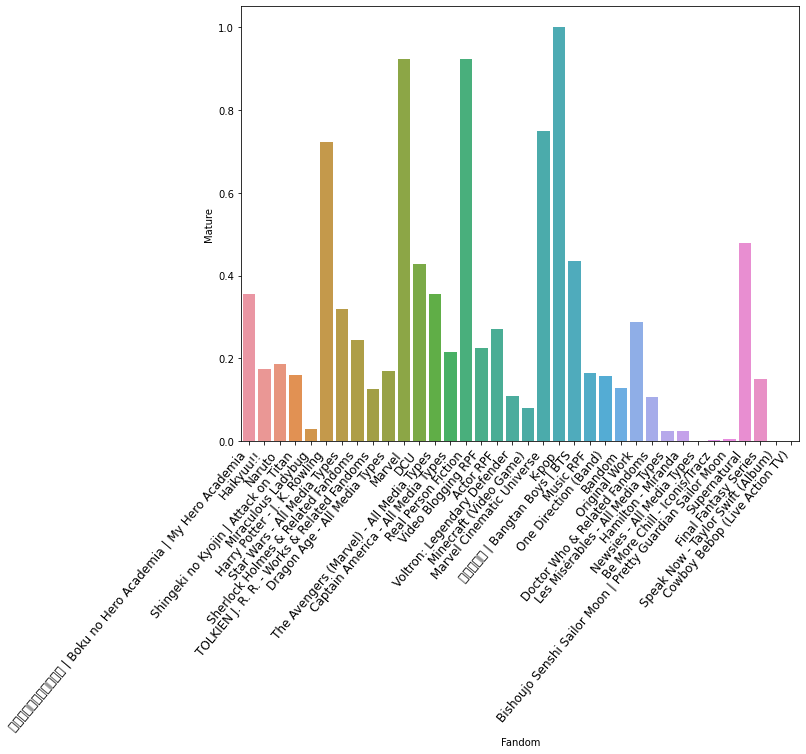

In [13]:
#create bar chart for Mature
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="Mature", data=ratings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

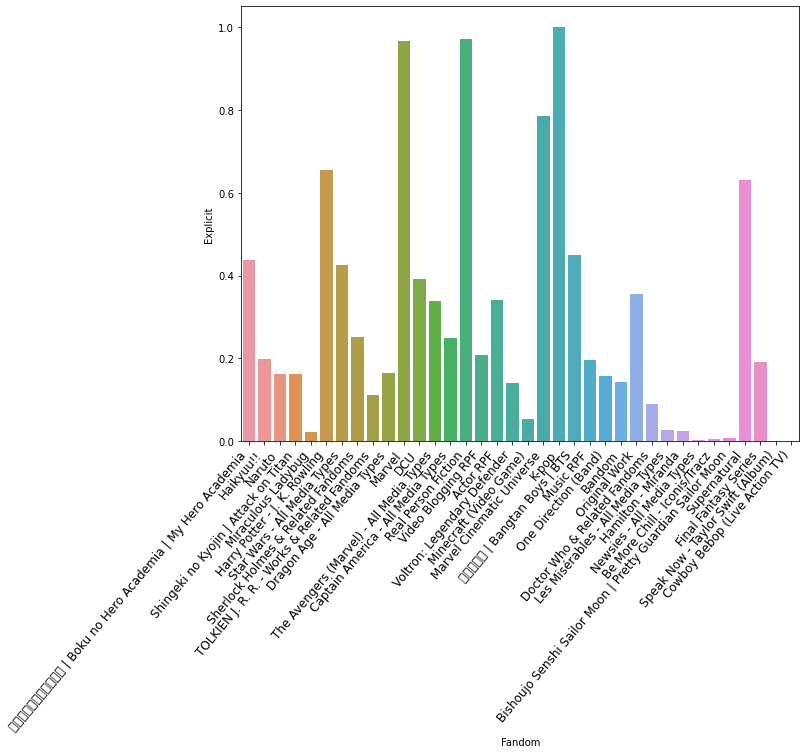

In [14]:
#create bar chart for Explicit
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="Explicit", data=ratings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

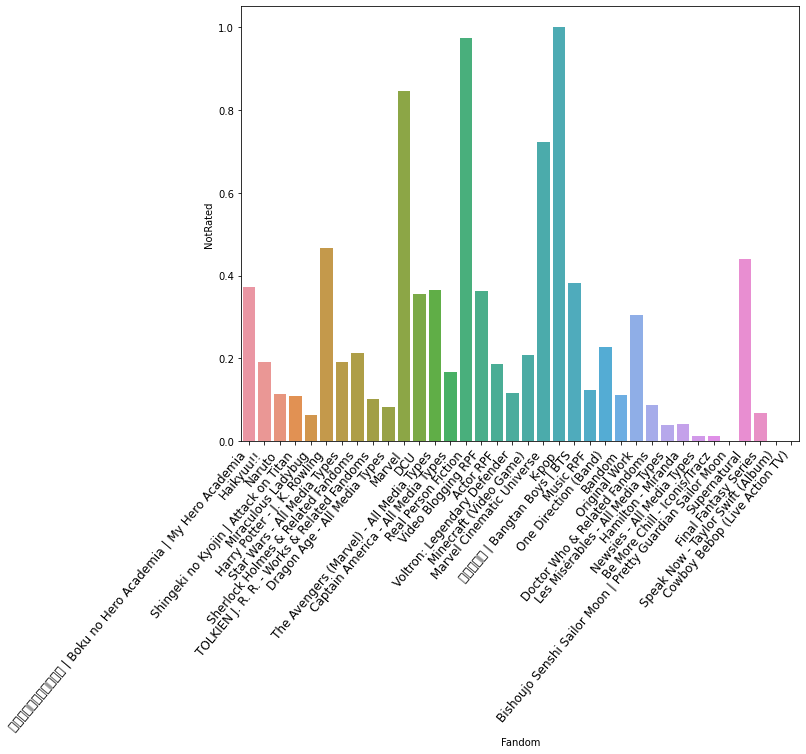

In [15]:
#create bar chart for Not Rated
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="NotRated", data=ratings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### Warnings
Now let's look at the distribution of warnings between fandoms. First we need to get the warning data into a form we can use.

In [31]:
temp_warning = df["warnings"].tolist()
for i in range(len(temp_warning)):
    temp_warning[i]["Fandom"] = fandoms[i]
warnings = pd.DataFrame(temp_warning, 
                        columns = [
                            "Fandom", 
                            "No Archive Warnings Apply", 
                            "Creator Chose Not To Use Archive Warnings", 
                            "Graphic Depictions Of Violence", 
                            "Major Character Death", 
                            "Underage",
                            "Rape/Non-Con"
                        ])
warnings.rename(columns = {
    "No Archive Warnings Apply":'NoWarningsApply', 
    "Creator Chose Not To Use Archive Warnings": 'NotUsed', 
    "Graphic Depictions Of Violence": 'Violence',
    "Major Character Death":"MCD",
    }, inplace = True)
warnings['NoWarningsApply'] = pd.to_numeric(warnings['NoWarningsApply'])
warnings['NotUsed'] = pd.to_numeric(warnings['NotUsed'])
warnings['Violence'] = pd.to_numeric(warnings['Violence'])
warnings['MCD'] = pd.to_numeric(warnings['MCD'])
warnings['Underage'] = pd.to_numeric(warnings['Underage'])
warnings['Rape/Non-Con'] = pd.to_numeric(warnings['Rape/Non-Con'])

#Normalize data
#standardized_dataset = (dataset - mean(dataset)) / standard_deviation(dataset))
warnings_nums = warnings[["NoWarningsApply", "NotUsed", "Violence", "MCD", "Underage", "Rape/Non-Con"]]
warnings[["NoWarningsApply", "NotUsed", "Violence", "MCD", "Underage", "Rape/Non-Con"]] = (warnings_nums-warnings_nums.min())/(warnings_nums.max()-warnings_nums.min())
warnings.head()

,Fandom,NoWarningsApply,NotUsed,Violence,MCD,Underage,Rape/Non-Con
0,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,0.333252,0.401878,0.705801,0.525312,0.642320,0.573367
1,Haikyuu!!,0.251164,0.232994,0.138227,0.218128,0.190890,0.118128
2,Naruto,0.136717,0.153334,0.259840,0.208431,0.238871,0.205104
3,Shingeki no Kyojin | Attack on Titan,0.087110,0.147684,0.216552,0.234514,0.207031,0.153134
4,Miraculous Ladybug,0.100103,0.086603,0.067899,0.078963,0.027344,0.024828


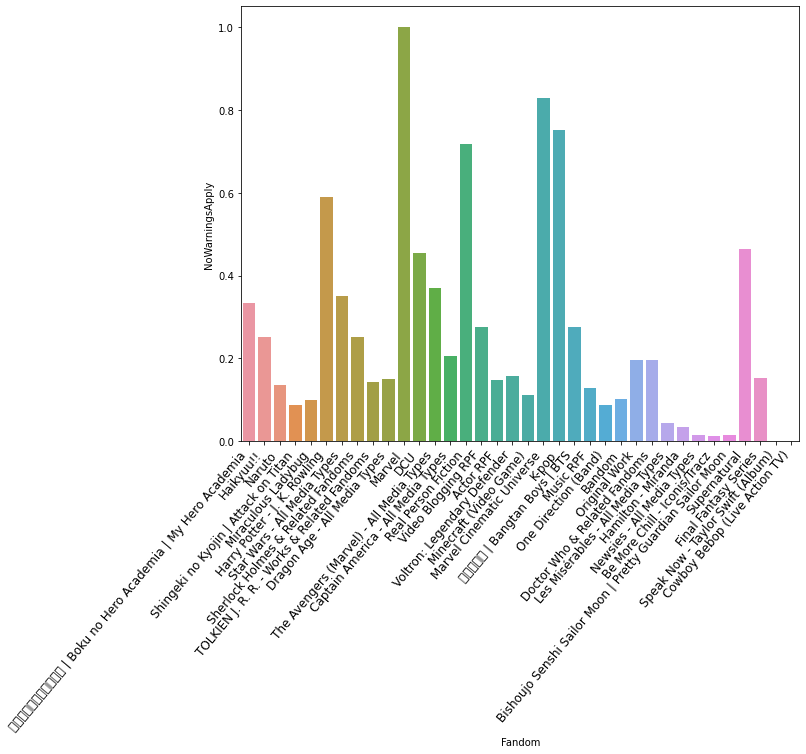

In [23]:
#create bar chart for NoWarningsApply
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="NoWarningsApply", data=warnings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

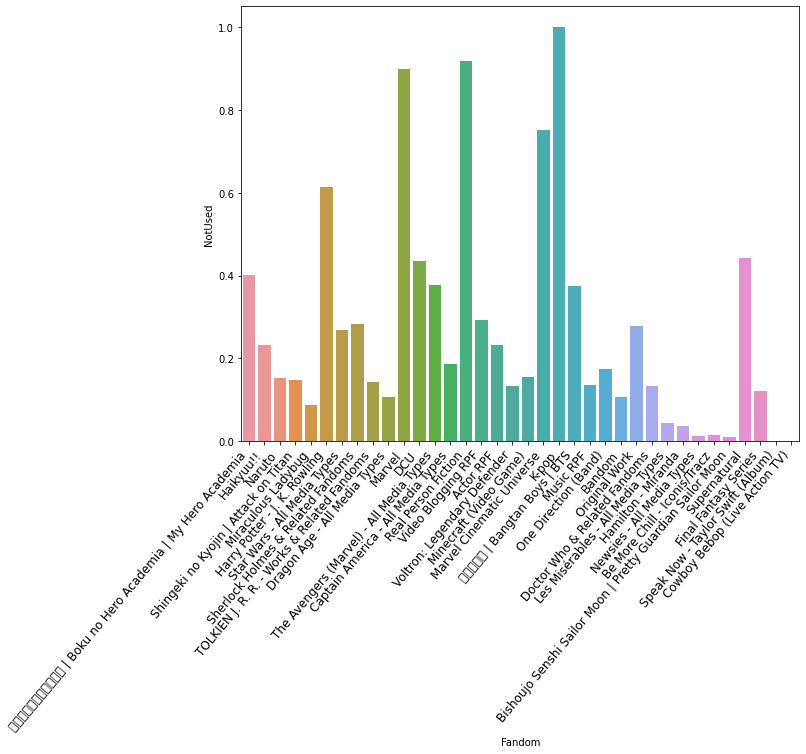

In [26]:
#create bar chart for NotUsed
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="NotUsed", data=warnings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

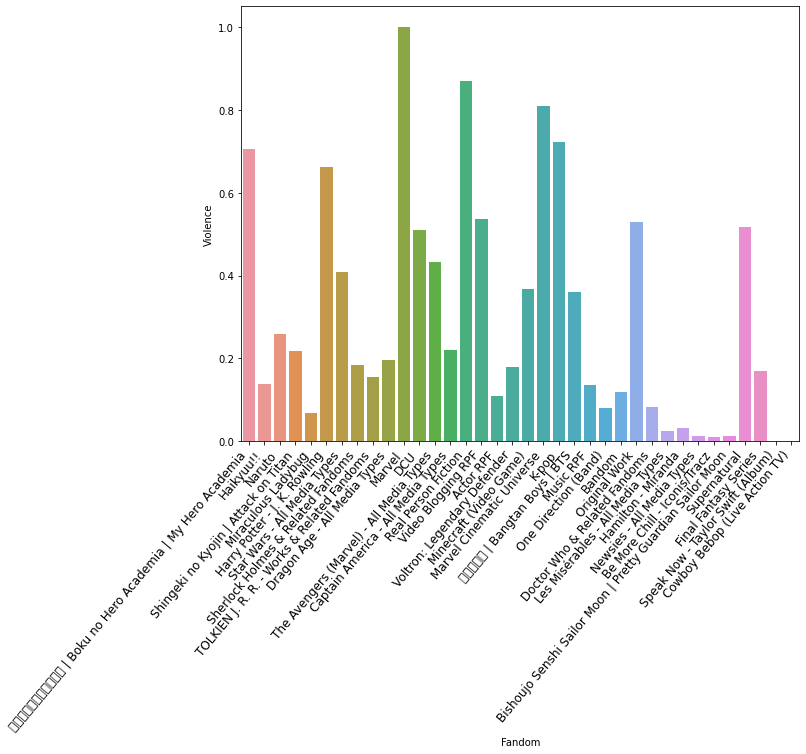

In [25]:
#create bar chart for Violence
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="Violence", data=warnings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

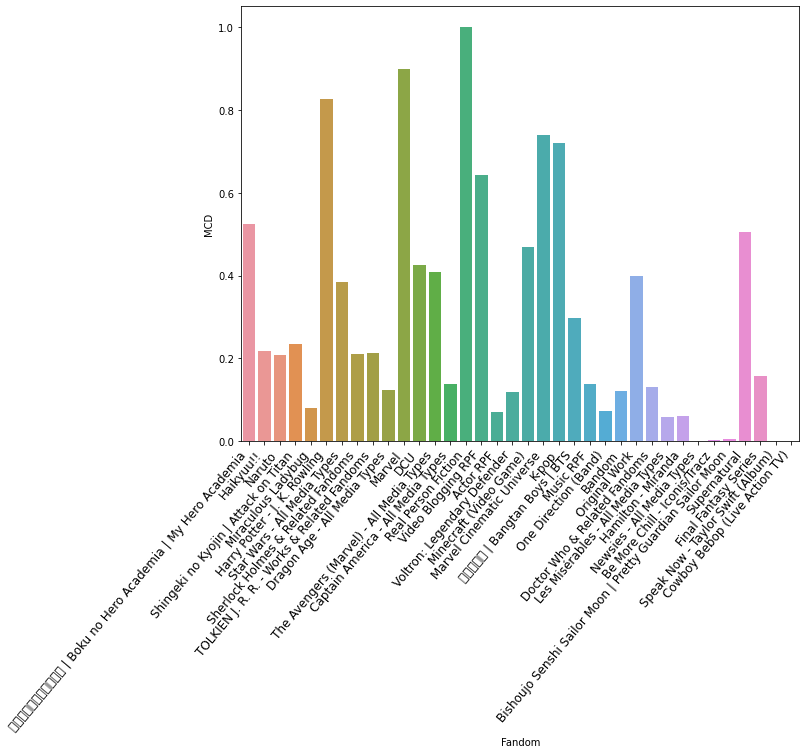

In [27]:
#create bar chart for MCD
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="MCD", data=warnings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

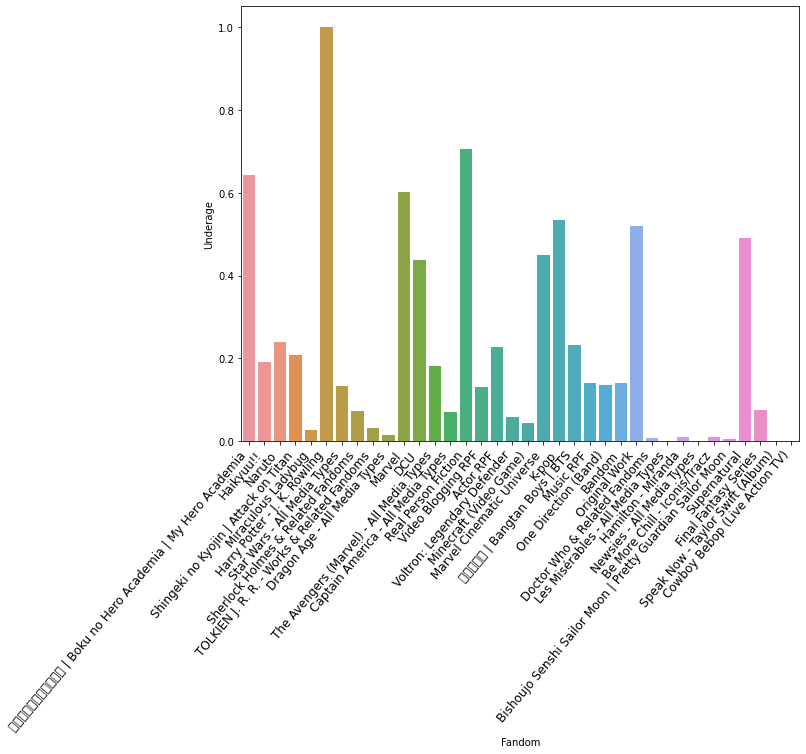

In [28]:
#create bar chart for Underage
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="Underage", data=warnings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

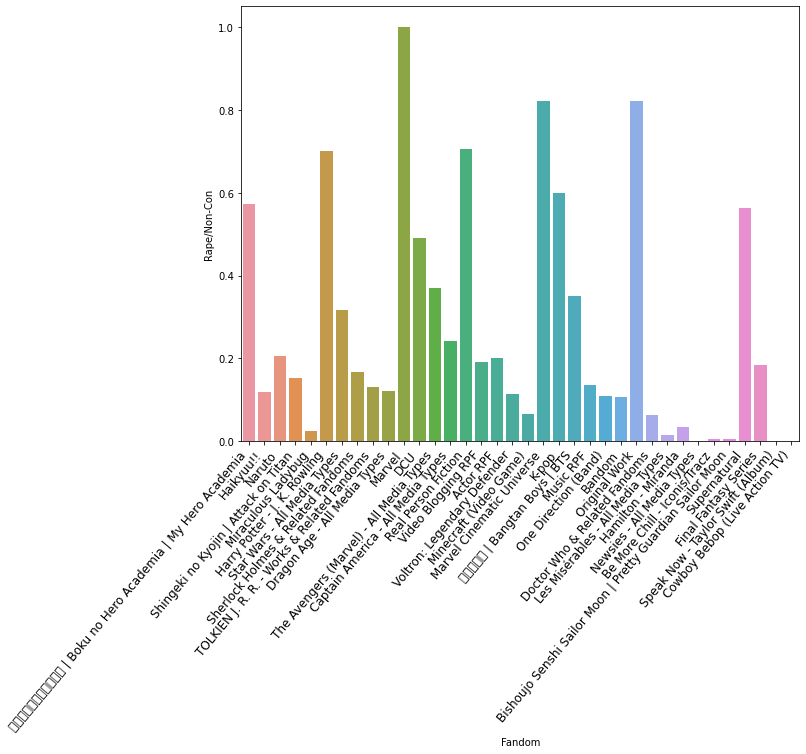

In [30]:
#create bar chart for Rape/Non-con
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="Rape/Non-Con", data=warnings)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### Categories
Now lets look at the distribution of the categories of relationships between the fandoms.

In [33]:
temp_cat = df["categories"].tolist()
for i in range(len(temp_cat)):
    temp_cat[i]["Fandom"] = fandoms[i]
cats = pd.DataFrame(temp_cat, 
                        columns = [
                            "Fandom", 
                            "M/M", 
                            "F/M", 
                            "Gen", 
                            "Multi", 
                            "F/F",
                            "Other"
                        ])

cats['M/M'] = pd.to_numeric(cats['M/M'])
cats['F/M'] = pd.to_numeric(cats['F/M'])
cats['Gen'] = pd.to_numeric(cats['Gen'])
cats['Multi'] = pd.to_numeric(cats['Multi'])
cats['F/F'] = pd.to_numeric(cats['F/F'])
cats['Other'] = pd.to_numeric(cats['Other'])

#Normalize data
#standardized_dataset = (dataset - mean(dataset)) / standard_deviation(dataset))
cats_nums = cats[["M/M", "F/M", "Gen", "Multi", "F/F", "Other"]]
cats[["M/M", "F/M", "Gen", "Multi", "F/F", "Other"]] = (cats_nums-cats_nums.min())/(cats_nums.max()-cats_nums.min())
cats.head()

,Fandom,M/M,F/M,Gen,Multi,F/F,Other
0,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,0.315783,0.321148,0.363103,0.618065,0.303995,0.617649
1,Haikyuu!!,0.288793,0.094864,0.102948,0.229818,0.068399,0.212417
2,Naruto,0.108803,0.174109,0.159097,0.195231,0.080278,0.149729
3,Shingeki no Kyojin | Attack on Titan,0.106376,0.123920,0.053526,0.135765,0.137961,0.156018
4,Miraculous Ladybug,0.010736,0.213237,0.075338,0.082352,0.076903,0.069646


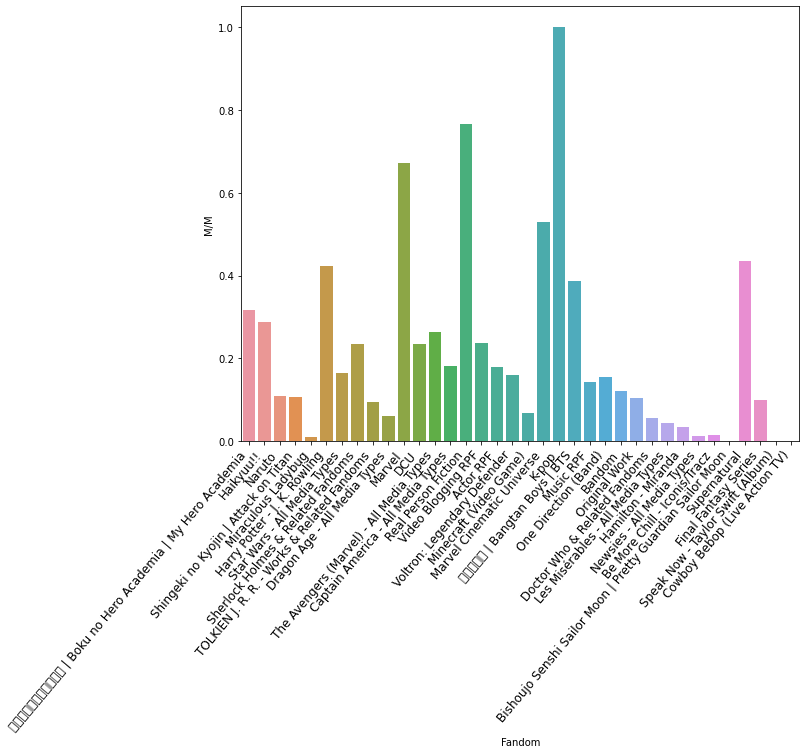

In [35]:
#create bar chart for M/M
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="M/M", data=cats)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

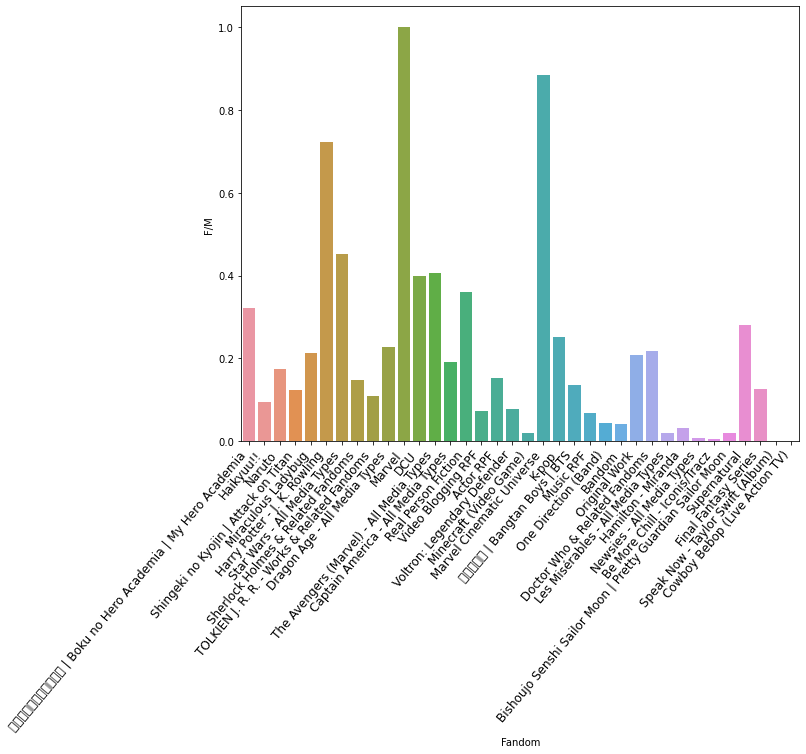

In [36]:
#create bar chart for F/M
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="F/M", data=cats)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

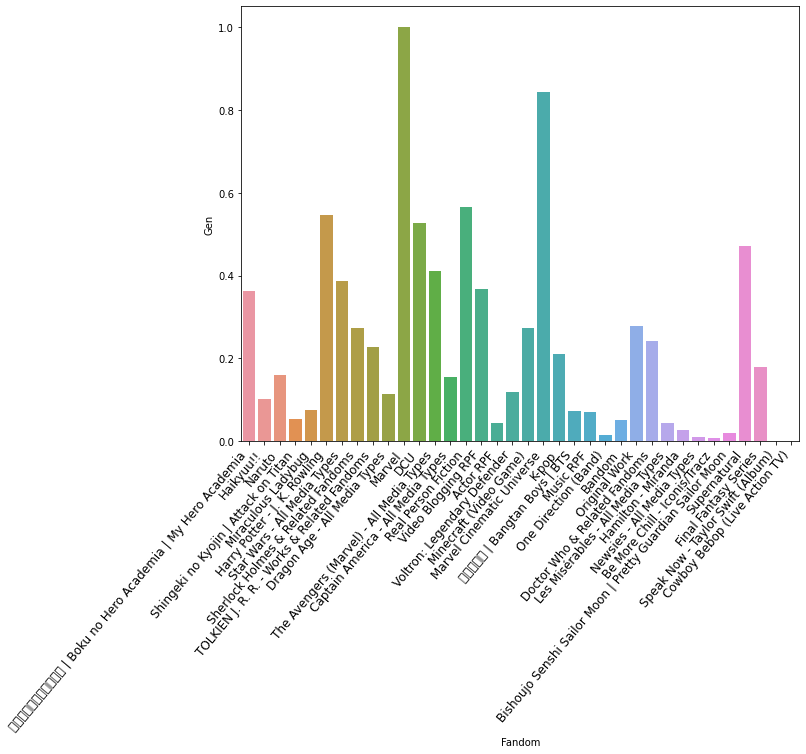

In [37]:
#create bar chart for Gen
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="Gen", data=cats)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

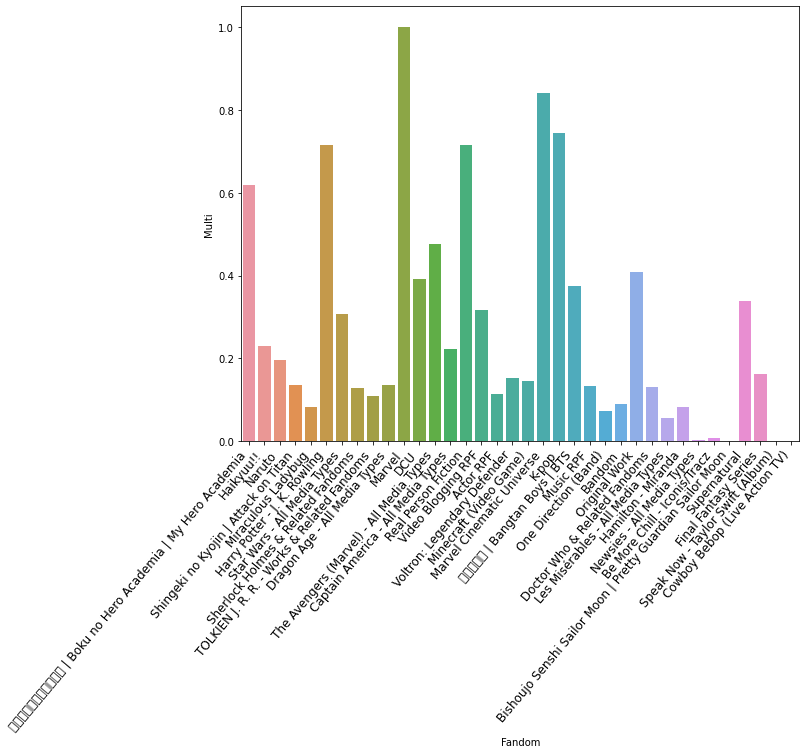

In [38]:
#create bar chart for Multi
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="Multi", data=cats)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

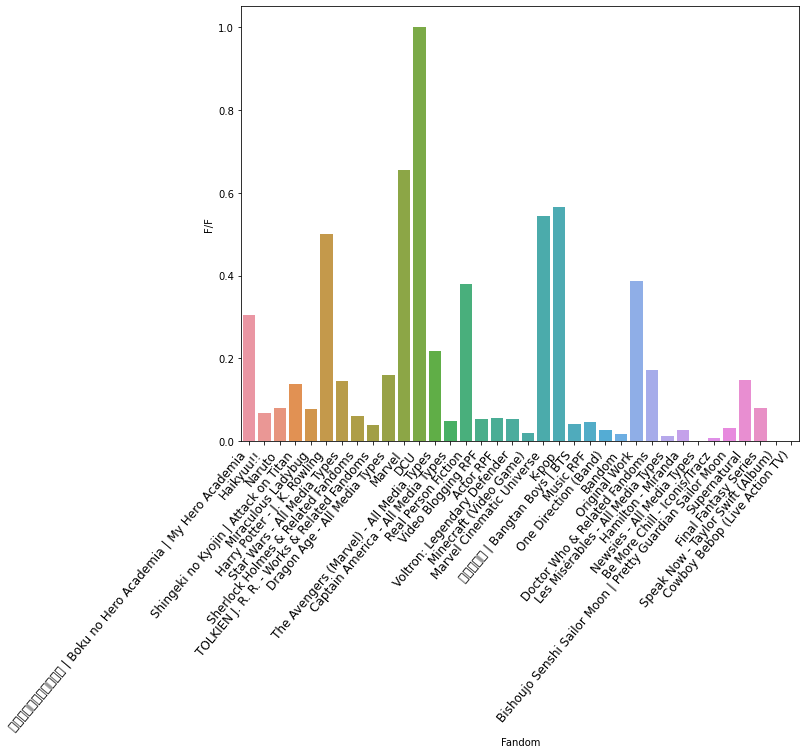

In [39]:
#create bar chart for F/F
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="F/F", data=cats)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

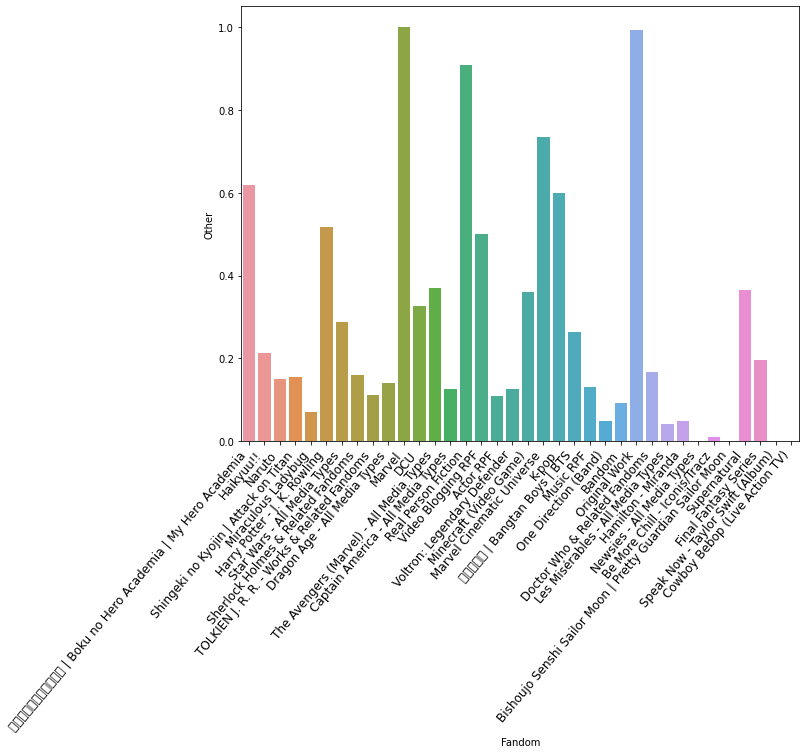

In [40]:
#create bar chart for Other
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Fandom", y="Other", data=cats)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### Crossovers
Within fanfiction there is a subsection referred to as crossovers. This is when the fanfiction takes place using the settings or characters of more than one fandom. For example, an common AU (Alternate Reality) is a Harry Potter or Hogwarts AU where the characters from another fandom attend Hogwarts. Another example would be the so-called "Superwholock" fandom which was a fandom that was the crossover between Supernatural, Doctor Who, and BBC's Sherlock in which all the main characters from these interacted in some fashion.

Now, lets take a look at the most popular fandoms to crossover with, based on the most popular fandoms within each category.

**Note:** An AU is not necessarily a crossover but at times it can fall within the crossover category.

In [57]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular fandoms crossed over with the fandoms that we scraped within our dataframe.
We are going to iterate through the fandoms we have and add each fandom into a new dictionary with a count beside it.
'''
crossover_count = {}
for i in range(len(df["fandom"])):
    temp = df["fandoms"][i]
    keys = temp.keys()
    for j in keys:
        if j in crossover_count:
            crossover_count[j] += 1
        else:
            if j == df["fandom"][i]:
                crossover_count[j] = 0
            else:
                crossover_count[j] = 1

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
crossovers = pd.DataFrame(list(crossover_count.items()), columns = ["fandom", "count"])
crossovers

,fandom,count
0,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,7
1,Naruto,6
2,Haikyuu!!,3
3,Harry Potter - J. K. Rowling,20
4,Shingeki no Kyojin | Attack on Titan,4
...,...,...
215,Lover - Taylor Swift (Album),1
216,evermore - Taylor Swift (Album),1
217,Fearless - Taylor Swift (Album),1
218,Cowboy Bebop (Live Action TV),0


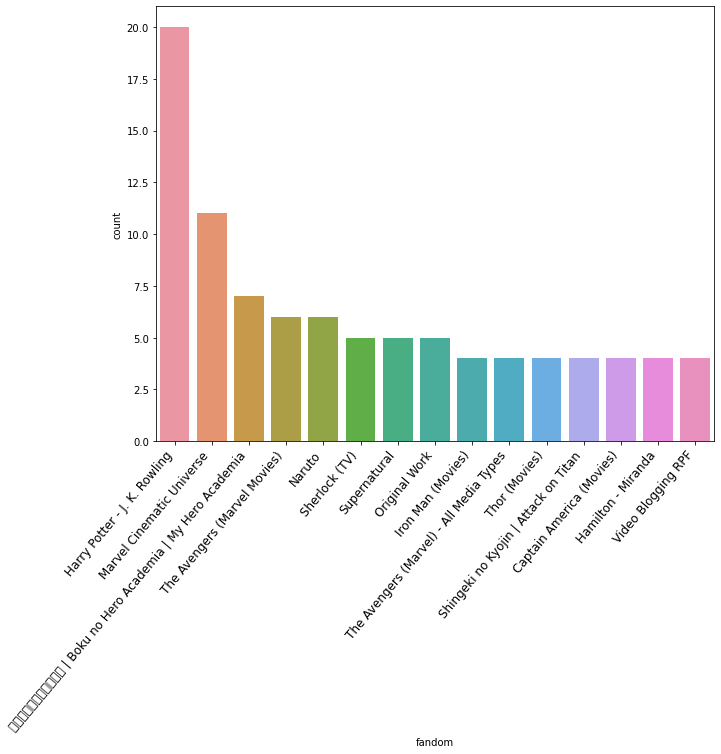

In [61]:
#Now that we have the data in a format we can work with, lets plot this data
#Since there is no way for us to make sense of the data when we use all 220 rows, we will subsect it to be the top 15.
#create bar chart for crossovers
crossovers_sorted = crossovers.sort_values('count', ascending = False)
crossovers_subset = crossovers_sorted[:15]
plt.figure(figsize=(10,8))

ax = sns.barplot(x="fandom", y="count", data=crossovers_subset)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### Freeform Tags

Let's take a look at the freeform tags across the fandoms we scraped next. Freeform tags are tags that are written and added to the story by the author. There can be as many or as little as they like. There are many common tags and tag trends that happen in fandoms, this is what we are most interested in.

But first, we need to get the data into a form we can analyze, following the same type of steps as the crossovers above.

In [63]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular freeform tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each tag into a new dictionary with a count beside it.
'''
tag_count = {}
for i in range(len(df["freeforms"])):
    temp = df["freeforms"][i]
    keys = temp.keys()
    for j in keys:
        if j in tag_count:
            tag_count[j] += 1
        else:
            tag_count[j] = 1

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
tags = pd.DataFrame(list(tag_count.items()), columns = ["tag", "count"])
tags

,tag,count
0,Fluff,34
1,Angst,36
2,Bakugou Katsuki Swears A Lot,1
3,Hurt/Comfort,29
4,Bakugou Katsuki is Bad at Feelings,1
...,...,...
76,Spoilers,1
77,Choking,1
78,Fix-It,1
79,Collars,1


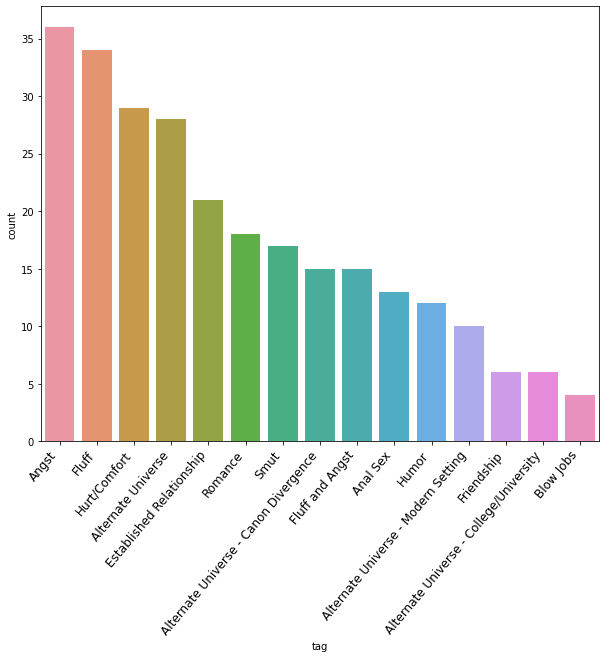

In [64]:
#Now that we have the data in a format we can work with, lets plot this data
#Since there is no way for us to make sense of the data when we use all 81 rows, we will subsect it to be the top 15.
#create bar chart for crossovers
tags_sorted = tags.sort_values('count', ascending = False)
tags_subset = tags_sorted[:15]
plt.figure(figsize=(10,8))

ax = sns.barplot(x="tag", y="count", data=tags_subset)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

### Characters and Relationships

The last two pieces of data we have are regarding popular characters and relationships within the fandoms we scraped. While this is more interesting in the context of the fandom itself, overall it would be interesting to see the most popular crossover characters and relationships throughout all fandoms. 

This will require some data wrangling.

**Note**: This will most likely not be accurately representative of characters that are most commonly crossed over as the larger the fandom is, the more fics there are associated with it and generally the less representation there are in the general figures for crossovers.

In [65]:
'''
First we need to get this data into something we can work with.
Currently, we have a dictionary of the most popular character tags within the fandoms that we scraped within our dataframe.
We are going to iterate through the tags we have and add each character tag into a new dictionary with a count beside it.
'''
character_count = {}
for i in range(len(df["characters"])):
    temp = df["characters"][i]
    keys = temp.keys()
    for j in keys:
        if j in character_count:
            character_count[j] += 1
        else:
            character_count[j] = 1

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
characters = pd.DataFrame(list(character_count.items()), columns = ["character", "count"])
characters

,character,count
0,Midoriya Izuku,1
1,Bakugou Katsuki,1
2,Todoroki Shouto,1
3,Kirishima Eijirou,1
4,Aizawa Shouta | Eraserhead,1
...,...,...
278,Jet Black,1
279,Vicious (Cowboy Bebop),1
280,Faye Valentine,1
281,Julia (Cowboy Bebop),1


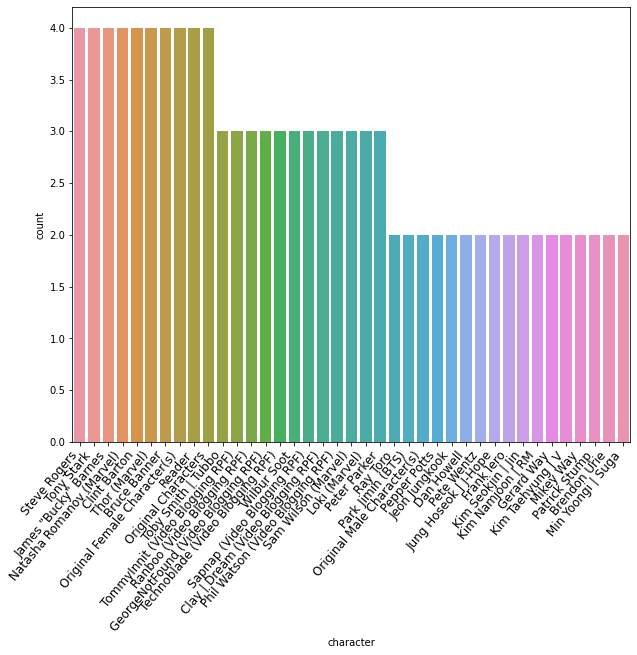

In [69]:
#Now that we have the data in a format we can work with, lets plot this data
#Since there is no way for us to make sense of the data when we use all 283 rows, we will subsect it to be every character that has more than one instance.
#create bar chart for crossovers
characters_sorted = characters.sort_values('count', ascending = False)
characters_subset = characters_sorted[characters_sorted["count"] > 1]
plt.figure(figsize=(10,8))

ax = sns.barplot(x="character", y="count", data=characters_subset)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()